In [1]:
# Import basic libraries
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import os

# Create data augmentation functions using OpenCV
import cv2
import numpy as np 
import random
from scipy.ndimage import convolve

In [2]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
import keras

Using TensorFlow backend.


In [3]:
# Create dataset directories

base_path = 'D:\Study\DataScience\OpenCV\OCR'

training_path = os.path.join(base_path, 'meter_ocr\\train\\')
testing_path = os.path.join(base_path, 'meter_ocr\\test\\')

In [4]:
# load the model
from keras.models import load_model

clf = load_model('D:\\Study\\DataScience\\OpenCV\\OCR\\meter_ocr\\meter_ocr.h5')

In [36]:
# Original Image
orig_img = cv2.imread('D:\\Study\\DataScience\\OpenCV\\OCR\\gasmetercolour.jpg')

# Image of extracted digits from meter image
img = cv2.imread('D:\\Study\\DataScience\\OpenCV\\OCR\\gasmeter_extracted_digits.jpg', 0)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

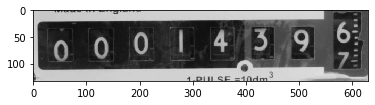

In [37]:
plt.imshow(img, cmap='gray')

In [7]:
# Blur image then find edges using Canny 
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

In [8]:
# Find the edges using Canny edge detector
edged = cv2.Canny(blurred, 30, 150)

In [9]:
# Find Contours
contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [10]:
def x_cord_contour(contours):
    #Returns the X cordinate for the contour centroid
    if cv2.contourArea(contours) > 10:
        M = cv2.moments(contours)
        return (int(M['m10']/M['m00']))
    else:
        pass

In [11]:
#Sort out contours left to right by using their x cordinates
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:8] # to get 8 digits of a meter reading
contours = sorted(contours, key = x_cord_contour, reverse = False)

In [12]:
def pre_process(image, inv = False):
    """Uses OTSU binarization on an image"""
    try:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    except:
        gray_image = image
        pass
    
    if inv == False:
        _, th2 = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    else:
        _, th2 = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    resized = cv2.resize(th2, (32,32), interpolation = cv2.INTER_AREA)
    return resized

In [35]:
# Create empty array to store entire number
full_number = []

# loop over the contours
for c in contours:
    # compute the bounding box for the rectangle
    (x, y, w, h) = cv2.boundingRect(c)    
    if w >= 5 and h >= 25 and cv2.contourArea(c) < 1000:
        roi = blurred[y:y + h, x:x + w]
        
        #ret, roi = cv2.threshold(roi, 20, 255,cv2.THRESH_BINARY_INV)
        
        roi_otsu = pre_process(roi, True)
        
        roi_otsu = cv2.cvtColor(roi_otsu, cv2.COLOR_GRAY2RGB)
        roi_otsu = keras.preprocessing.image.img_to_array(roi_otsu)
        roi_otsu = roi_otsu * 1./255
        roi_otsu = np.expand_dims(roi_otsu, axis=0)
        image = np.vstack([roi_otsu])
        number = str(clf.predict_classes(image, batch_size = 10))[1]
        full_number.append(number)
        #print(number)
        
full_number = [''.join(full_number)]

print('The meter reading is: {}'.format(full_number[0]))

The meter reading is: 00014
